In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from scipy.stats import zscore

## Acquire
- read the csv file as a dataframe
- use .describe(), .info(), .shape

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.shape

(378661, 15)

In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
# there are missing values in  name and usd pledged
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [7]:
# what is the count of missing values
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

#### **Takeaways:**
- ***name*** is missing 4 values
- ***usd pledged*** is missing 3797 values
- ***usd pledged*** has a space that should be replaced with an underscore

In [8]:
# What do the 'name' rows with NaN values look like
df[df.name.isna() == True]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [9]:
# every row has a unique ID so we will not be able to figure out the name
df. shape, df.ID.nunique()

((378661, 15), 378661)

In [10]:
# there are 150 row that were successful
(df[df['usd pledged'].isna() == True].state == 'successful').sum()

105

In [11]:
# there are 150 row that failed
(df[df['usd pledged'].isna() == True].state == 'failed').sum()

105

In [12]:
df.head(6)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00


#### Notes from acquire and data review
- I do not feel these rows will have a big enough effect on the data, so I plan to drop them
    - name: 4
    - usd_pledged
   
   
- I will rename the column 'usd pledged' to usd_pledged

In [13]:
df.dropna(inplace=True) 

In [14]:
# rename 'usd pledged to usd_pledged 
df.rename(columns={'usd pledged': 'usd_pledged'}, inplace=True)

In [15]:
df.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [16]:
df. shape, df.ID.nunique()

((374860, 15), 374860)

## Prepare
  - narrow scope to just projects that have either succeeded or failed
  - choose a subset of the columns to focus on
  - do a train-test split

In [17]:
# make a new dataframe of only success and failures
df = df[(df.state == 'failed') | (df.state == 'successful')]

In [18]:
df = df[['ID', 'main_category', 'state', 'backers', 'usd_goal_real']]

In [19]:
# do we have any nulls in this dataframe
df.isna().sum()

ID               0
main_category    0
state            0
backers          0
usd_goal_real    0
dtype: int64

- we have zero nulls in this dataframe

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             331462 non-null  int64  
 1   main_category  331462 non-null  object 
 2   state          331462 non-null  object 
 3   backers        331462 non-null  int64  
 4   usd_goal_real  331462 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 15.2+ MB


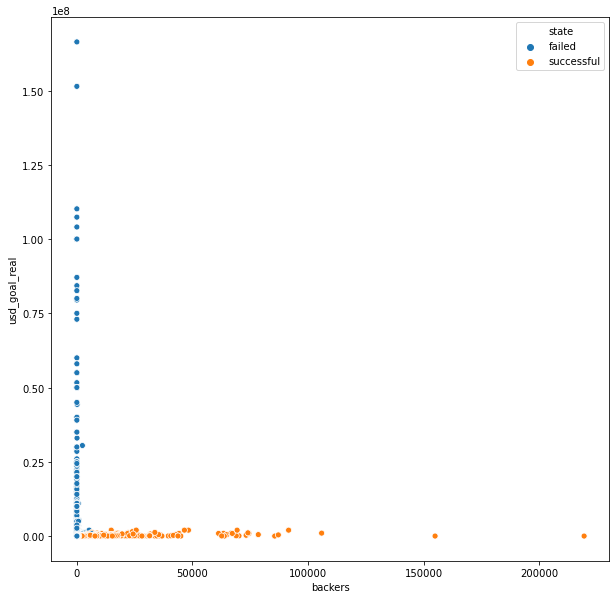

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='backers', y='usd_goal_real', data=df, hue='state')

- We nee to convert success and fail to integer values

In [22]:
def label_encoder(traing, test):
    le = LabelEncoder()
    train['state'] = le.fit_transform(train.state)
    test['state'] = le.transform(test.state)
    return le, train, test

In [23]:
train, test = train_test_split(df, train_size=.75, random_state=123)

In [24]:
le, train, test = label_encoder(train, test)

> For state: success = 1, failure = 0

In [25]:
train.head(13)

,ID,main_category,state,backers,usd_goal_real
251268,348145816,Crafts,0,0,3070.07
88038,1447519911,Music,0,1,6000.00
245772,319969265,Publishing,1,148,11000.00
330392,753171907,Art,0,0,2750.00
261697,40102004,Photography,0,2,422.26
12484,1062641038,Theater,0,6,1315.41
105648,1537029363,Publishing,0,1,6000.00
41605,1211853542,Crafts,0,3,5000.00
98282,1498903916,Publishing,0,0,750.00
372802,969866972,Publishing,0,41,6400.00


In [26]:
test.head(12)

,ID,main_category,state,backers,usd_goal_real
214241,2091654583,Art,0,0,154.75
35701,1181101973,Film & Video,1,36,2500.00
157795,180265318,Technology,0,2,33969.24
119222,1605681436,Film & Video,0,48,50000.00
81855,141618599,Design,1,64,2250.00
73490,1374362223,Film & Video,0,3,791.69
167739,1853307250,Film & Video,0,9,1500.00
32770,1166481953,Photography,1,45,850.00
99974,1507768183,Music,0,12,65475.02
30634,1155808900,Music,0,10,5000.00


- let's scale some of the columns so we can see the data better

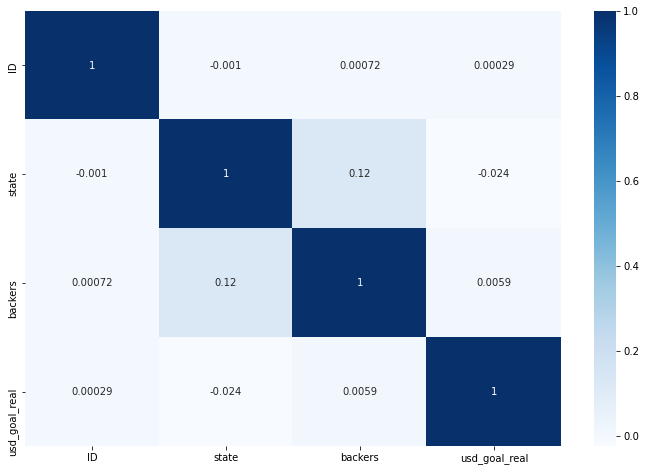

In [27]:
# Overall correlation of the features and the target.
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

## Explore

- Hypothesis
- visuals
- stats

### Hypotheses:
#### Hypothesis 1:

- $H_0:$ Main Category and state are related.
- $H_a:$ Main Category and state are not related.

#### Hypothesis 2:

- $H_0:$ Main Category and backers are related.
- $H_a:$ Main Category and backers are not related.

#### Hypothesis 3:

- $H_0:$ backers and state are related.
- $H_a:$ backers and state are not related.



In [28]:
train.main_category.value_counts()

Film & Video    42371
Music           34290
Publishing      26618
Games           21473
Technology      20188
Art             19267
Design          19054
Food            16522
Fashion         14814
Theater          7679
Comics           7415
Photography      7211
Crafts           5867
Journalism       3103
Dance            2724
Name: main_category, dtype: int64

In [29]:
train.backers.value_counts()

0        28970
1        22329
2        15154
3        10400
4         7902
         ...  
6081         1
12354        1
2245         1
4422         1
2750         1
Name: backers, Length: 3454, dtype: int64

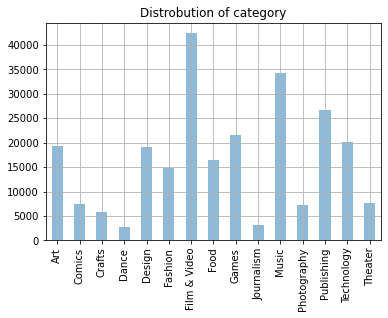

In [30]:
train.main_category.value_counts().sort_index().plot(kind='bar', alpha=.5)
plt.title('Distrobution of category')
plt.grid(b=True, which='major')

- is main category and state related?

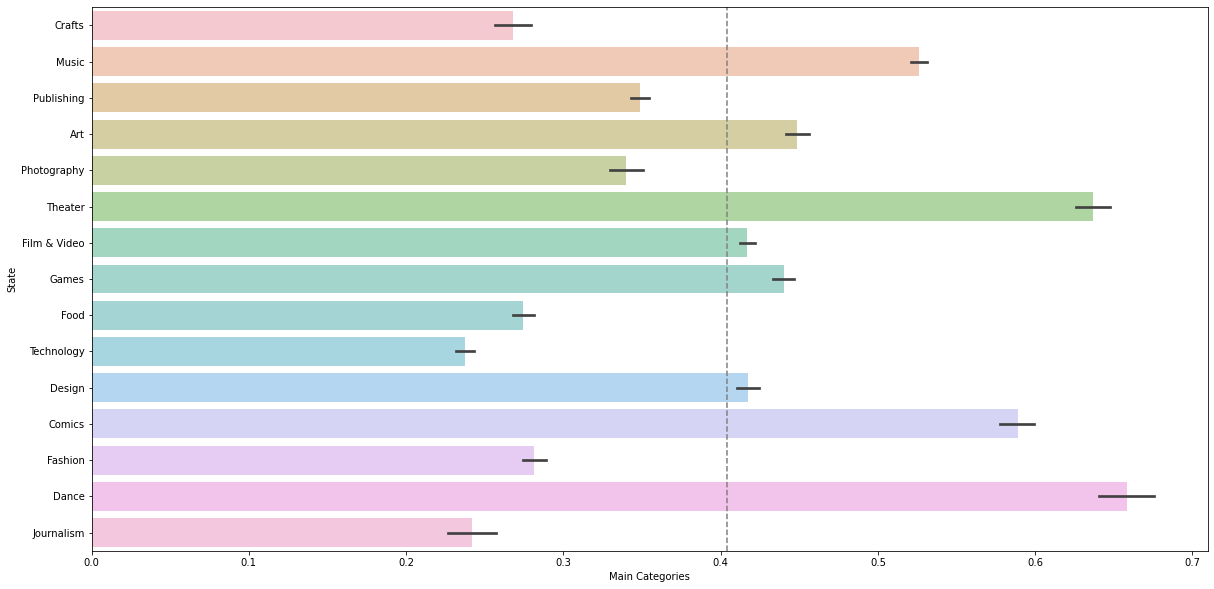

In [31]:
# is main category and state related?
plt.figure(figsize=(20, 10))

survival_rate = train.state.mean()

# for i, feature in enumerate(features):
sns.barplot('state', 'main_category', data=train, alpha=.5)
plt.ylabel('State')
plt.xlabel('Main Categories')
plt.axvline(survival_rate, ls='--', color='grey')

- is main category and the number of backers realted?

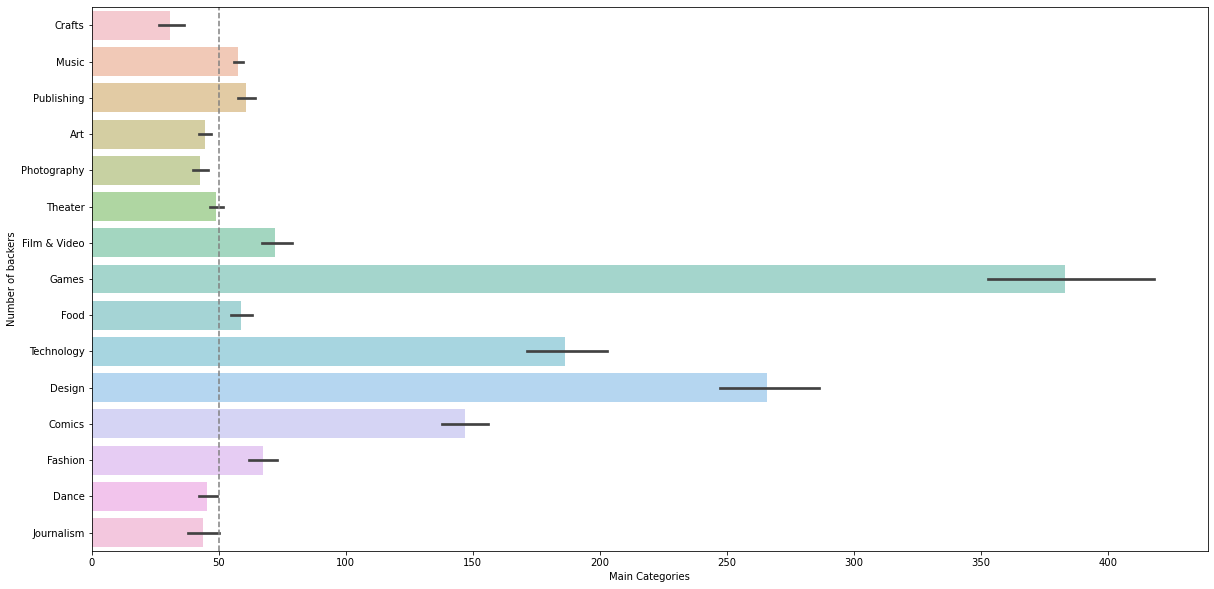

In [32]:
plt.figure(figsize=(20, 10))

survival_rate = train.state.mean()

# for i, feature in enumerate(features):
sns.barplot('backers', 'main_category', data=train, alpha=.5)
plt.ylabel('Number of backers')
plt.xlabel('Main Categories')
plt.axvline(50, ls='--', color='grey')

- is number of backers and state realted?

In [33]:
# plt.figure(figsize=(20, 10))

# survival_rate = train.state.mean()

# # for i, feature in enumerate(features):
# sns.swarmplot('state', 'backers', data=train, alpha=.5)
# plt.ylabel('Backers', fontsize=14)
# plt.xlabel('\nState', fontsize=14)
# plt.axhline(survival_rate, ls='--', color='grey')
# locs, labels = plt.xticks()  # Get the current locations and labels.

# plt.xticks([0, 1], ['Failed', 'Suceeded'],
#        rotation=20)  # Set text labels and properties.
# plt.show()

In [34]:
pd.crosstab(train.main_category, train.state)

state,0,1
main_category,,
Art,10620,8647
Comics,3049,4366
Crafts,4296,1571
Dance,930,1794
Design,11097,7957
Fashion,10645,4169
Film & Video,24706,17665
Food,11988,4534
Games,12025,9448


In [35]:
train.main_category.value_counts()

Film & Video    42371
Music           34290
Publishing      26618
Games           21473
Technology      20188
Art             19267
Design          19054
Food            16522
Fashion         14814
Theater          7679
Comics           7415
Photography      7211
Crafts           5867
Journalism       3103
Dance            2724
Name: main_category, dtype: int64

In [36]:
train.main_category.mode()[0]

'Film & Video'

In [37]:
df['bl_mc_prediction'] = train.main_category.mode()[0]

In [38]:
df.head()

,ID,main_category,state,backers,usd_goal_real,bl_mc_prediction
0,1000002330,Publishing,failed,0,1533.95,Film & Video
1,1000003930,Film & Video,failed,15,30000.00,Film & Video
2,1000004038,Film & Video,failed,3,45000.00,Film & Video
3,1000007540,Music,failed,1,5000.00,Film & Video
5,1000014025,Food,successful,224,50000.00,Film & Video


In [49]:
(df.main_category == df.bl_mc_prediction).value_counts()

False    274959
True      56503
dtype: int64

In [40]:
import scipy as sp

In [41]:
sp.stats.ttest_ind(
    train[train.state == 1].backers,
    train[train.state == 0].backers
)

Ttest_indResult(statistic=62.74674683247563, pvalue=0.0)

print(df)
z_scores = stats. zscore(df) calculate z-scores of `df`
abs_z_scores = np. abs(z_scores)
filtered_entries = (abs_z_scores < 3). all(axis=1)
new_df = df[filtered_entries]
print(new_df)